In [1]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Measurement column names
from sqlalchemy import inspect
inspector = inspect(engine)

print("Measurment columns:")
print("")
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column["name"],column["type"])

print("")
print("")

print("Station columns:")
print("")
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"],column["type"])


Measurment columns:

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


Station columns:

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

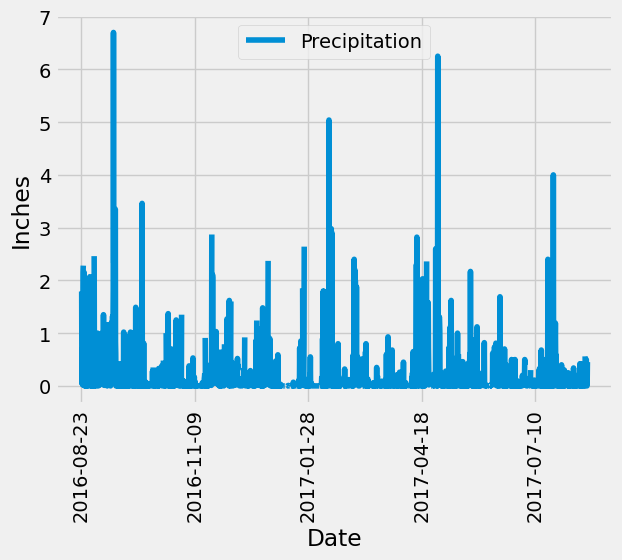

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_data, columns=['Date','Precipitation'])

# Sort the dataframe by date
sorted_prcp_df = prcp_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
sorted_prcp_df.plot(x='Date',y='Precipitation',rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')

plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(Station.station).count()
num_stations

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations
# Station 'USC00519281' is the most active station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_info = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
most_active_station_info

[(54.0, 85.0, 71.66378066378067)]

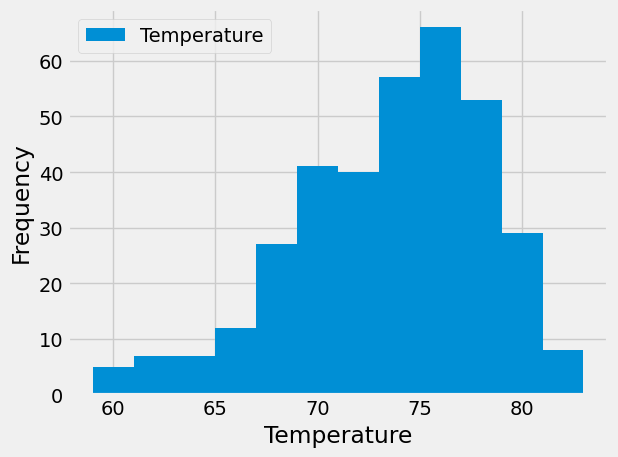

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.date >= one_year).\
        filter(Measurement.station == 'USC00519281').all()

tobs_df = pd.DataFrame(tobs_data, columns=['Temperature'])

tobs_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Close Session

In [17]:
# Close Session
session.close()